In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/content/Earthquake_data_processed.xlsx')

In [3]:
df.head()

,Unnamed: 0,Date(YYYY/MM/DD),Time(UTC),Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
0,0,1966/07/01,09:41:21.82,35.9463,-120.4700,12.26,3.2,Mx,7,171,20,0.02,NCSN,-4540462
1,1,1966/07/02,12:08:34.25,35.7867,-120.3265,8.99,3.7,Mx,8,86,3,0.04,NCSN,-4540520
2,2,1966/07/02,12:16:14.95,35.7928,-120.3353,9.88,3.4,Mx,8,89,2,0.03,NCSN,-4540521
3,3,1966/07/02,12:25:06.12,35.7970,-120.3282,9.09,3.1,Mx,8,101,3,0.08,NCSN,-4540522
4,4,1966/07/05,18:54:54.36,35.9223,-120.4585,7.86,3.1,Mx,9,161,14,0.04,NCSN,-4540594


Convert Data, Time columns which are Strings to Integers

In [4]:
# Step 1: Convert 'Date(YYYY/MM/DD)' to datetime format
df['Date(YYYY/MM/DD)'] = pd.to_datetime(df['Date(YYYY/MM/DD)'], format='%Y/%m/%d')

# Step 2: Convert datetime to numeric (int)
df['Date(YYYY/MM/DD)'] = pd.to_numeric(df['Date(YYYY/MM/DD)'])

In [5]:
# Convert 'Time(UTC)' to timedelta, then calculate seconds since midnight
df['Time(UTC)'] = pd.to_timedelta(df['Time(UTC)']).dt.total_seconds()

In [6]:
df.head()

,Unnamed: 0,Date(YYYY/MM/DD),Time(UTC),Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
0,0,-110592000000000000,34881.82,35.9463,-120.4700,12.26,3.2,Mx,7,171,20,0.02,NCSN,-4540462
1,1,-110505600000000000,43714.25,35.7867,-120.3265,8.99,3.7,Mx,8,86,3,0.04,NCSN,-4540520
2,2,-110505600000000000,44174.95,35.7928,-120.3353,9.88,3.4,Mx,8,89,2,0.03,NCSN,-4540521
3,3,-110505600000000000,44706.12,35.7970,-120.3282,9.09,3.1,Mx,8,101,3,0.08,NCSN,-4540522
4,4,-110246400000000000,68094.36,35.9223,-120.4585,7.86,3.1,Mx,9,161,14,0.04,NCSN,-4540594


Splitting into Features-Target

In [7]:
from sklearn.model_selection import train_test_split

# Select relevant columns
X = df[['Date(YYYY/MM/DD)','Time(UTC)','Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
y = df['Magnitude(ergs)']

# Split data into training and testing sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the testing set
y_pred = regressor.predict(X_test)

# Compute R^2 and MSE
r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

print("R^2: {:.2f}, MSE: {:.2f}".format(r2_lr, mse_lr))

R^2: 0.00, MSE: 0.18


Combined Multiple Linear Regression Graph

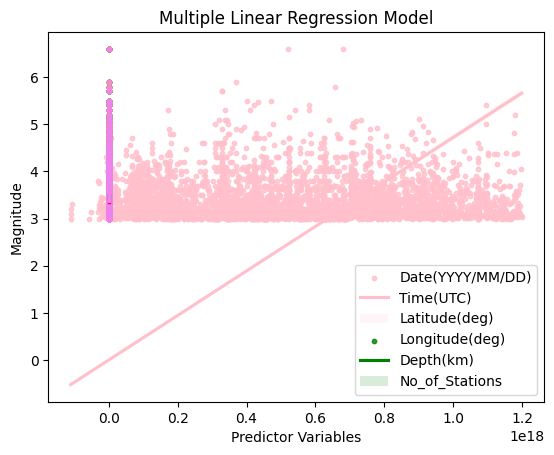

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x=X_test['Date(YYYY/MM/DD)'], y=y_test, color='pink', scatter_kws={'s': 10})
sns.regplot(x=X_test['Time(UTC)'], y=y_test, color='green', scatter_kws={'s': 10})
sns.regplot(x=X_test['Latitude(deg)'], y=y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude(deg)'], y=y_test, color='red', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth(km)'], y=y_test, color='yellow', scatter_kws={'s': 10})
sns.regplot(x=X_test['No_of_Stations'], y=y_test, color='violet', scatter_kws={'s': 10})
plt.legend(labels=['Date(YYYY/MM/DD)','Time(UTC)','Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

Individual Multiple Linear Regression Graph

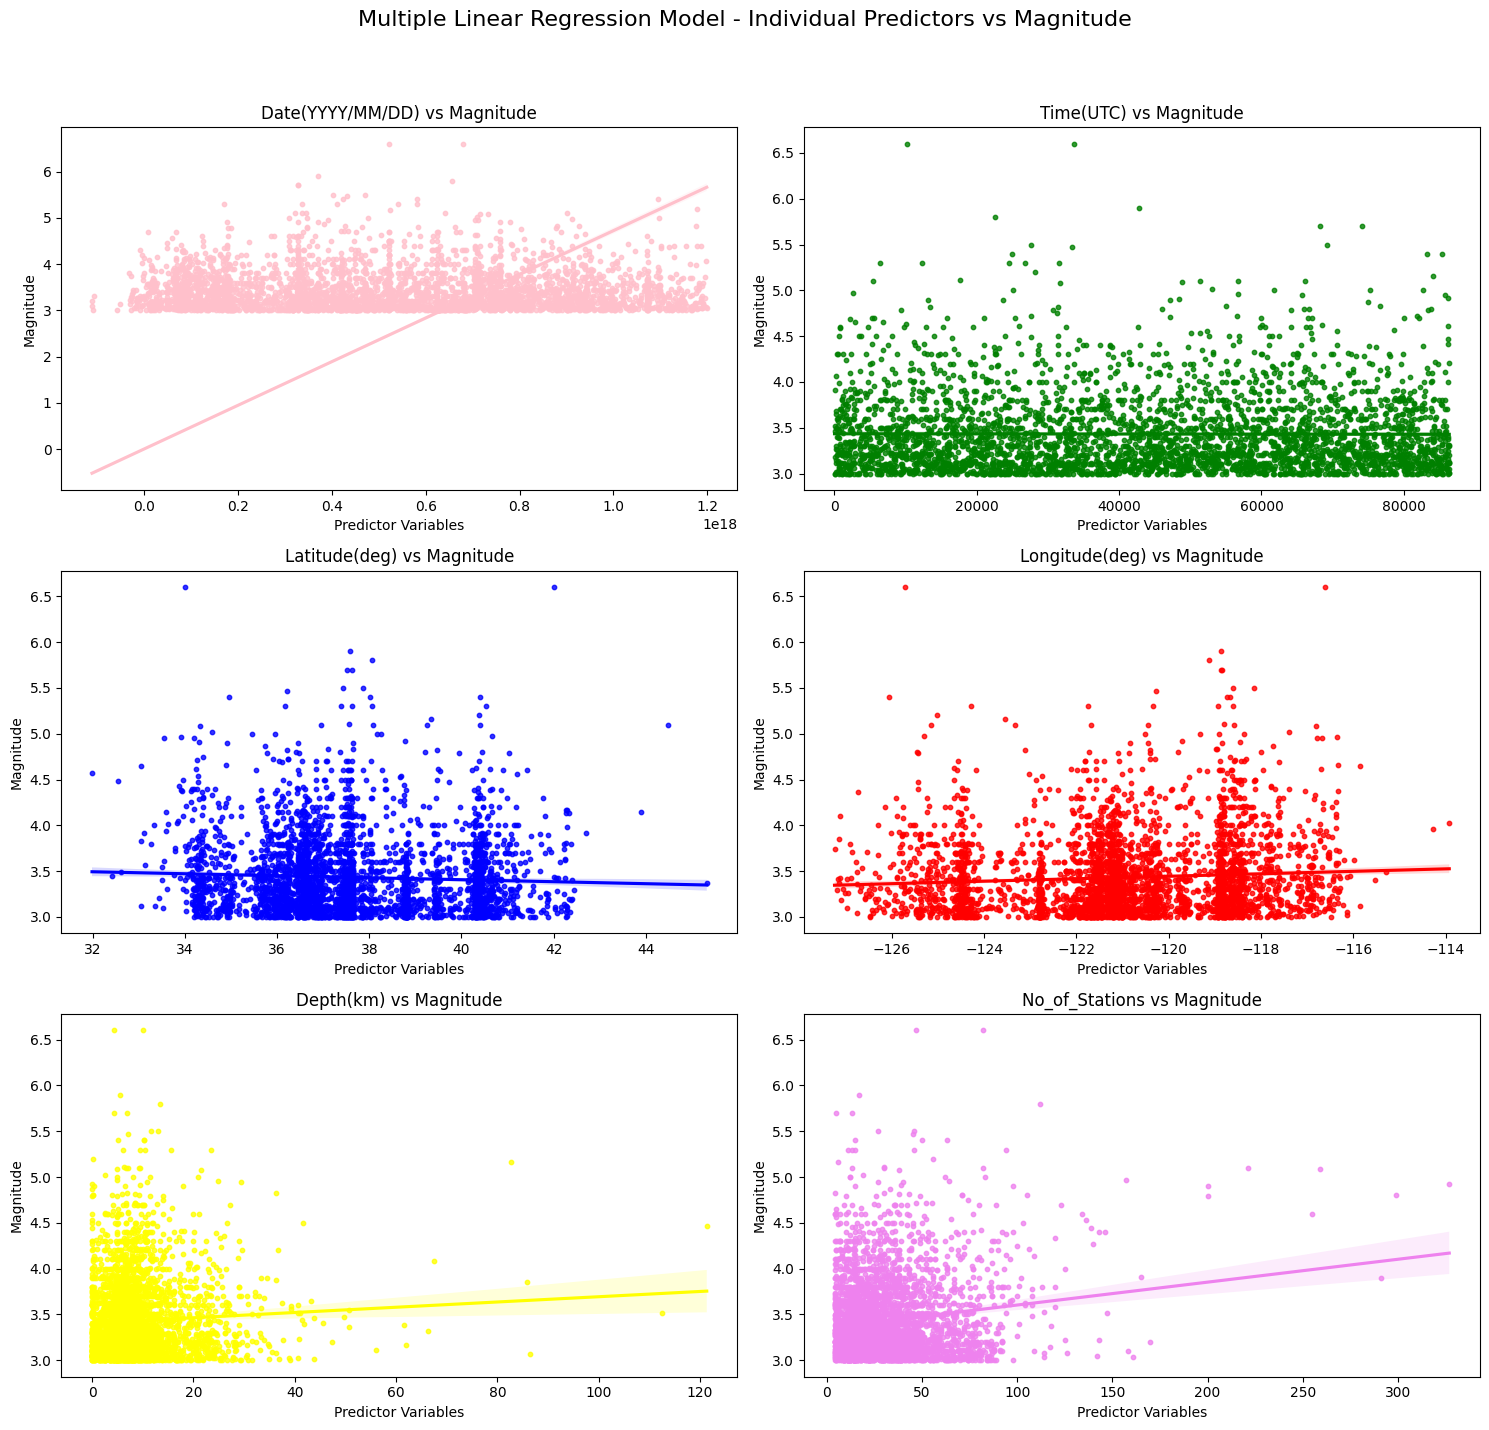

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Multiple Linear Regression Model - Individual Predictors vs Magnitude', fontsize=16)

# Plot each predictor in a separate subplot
sns.regplot(x=X_test['Date(YYYY/MM/DD)'], y=y_test, color='pink', scatter_kws={'s': 10}, ax=axes[0, 0])
axes[0, 0].set_title('Date(YYYY/MM/DD) vs Magnitude')

sns.regplot(x=X_test['Time(UTC)'], y=y_test, color='green', scatter_kws={'s': 10}, ax=axes[0, 1])
axes[0, 1].set_title('Time(UTC) vs Magnitude')

sns.regplot(x=X_test['Latitude(deg)'], y=y_test, color='blue', scatter_kws={'s': 10}, ax=axes[1, 0])
axes[1, 0].set_title('Latitude(deg) vs Magnitude')

sns.regplot(x=X_test['Longitude(deg)'], y=y_test, color='red', scatter_kws={'s': 10}, ax=axes[1, 1])
axes[1, 1].set_title('Longitude(deg) vs Magnitude')

sns.regplot(x=X_test['Depth(km)'], y=y_test, color='yellow', scatter_kws={'s': 10}, ax=axes[2, 0])
axes[2, 0].set_title('Depth(km) vs Magnitude')

sns.regplot(x=X_test['No_of_Stations'], y=y_test, color='violet', scatter_kws={'s': 10}, ax=axes[2, 1])
axes[2, 1].set_title('No_of_Stations vs Magnitude')

# Set overall labels
for ax in axes.flat:
    ax.set(xlabel='Predictor Variables', ylabel='Magnitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **SVM**

In [10]:
from sklearn.svm import SVR

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [11]:
# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)

Test score: -38.61814138941946


In [12]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: -38.62, MSE: 7.21


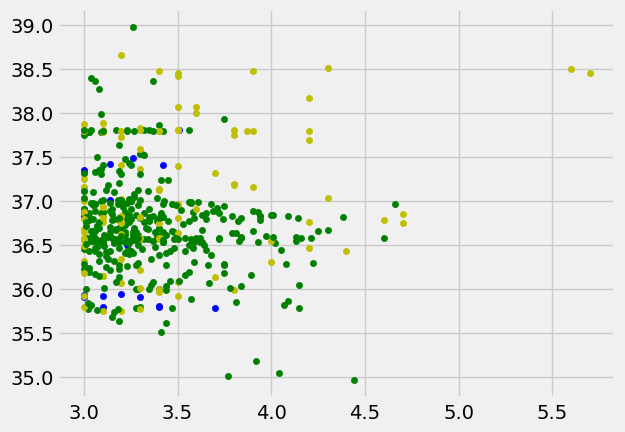

In [ ]:
import numpy as np
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# color = ['y', 'b', 'g', 'k']

subset_size = 500

# choose the column names from the dataset
features = df[['Magnitude(ergs)','Latitude(deg)']][:subset_size].values
classes = df['Magnitude_type'][:subset_size].values

# create 3 svm with rbf kernels
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')
svm4 = SVC(kernel ='rbf')

# fit each svm's
svm1.fit(features, (classes=='ML').astype(int))
svm2.fit(features, (classes=='Mx').astype(int))
svm3.fit(features, (classes=='Md').astype(int))

fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot the contours
'''
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)
'''
color = ['y', 'b', 'g', 'k', 'm']



for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[0])
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[1])
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[2])
    else:
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[4])
plt.show()

In [ ]:
df.shape

(18030, 14)

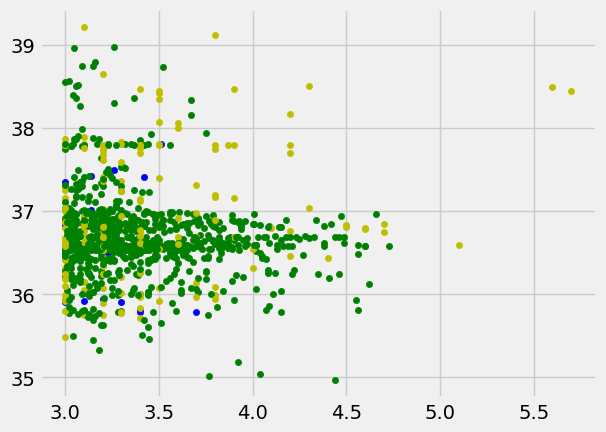

In [ ]:
import numpy as np
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# color = ['y', 'b', 'g', 'k']

size = 1000

# choose the column names from the dataset
features = df[['Magnitude(ergs)','Latitude(deg)']][:size].values
classes = df['Magnitude_type'][:size].values

# create 3 svm with rbf kernels
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')
svm4 = SVC(kernel ='rbf')

# fit each svm's
svm1.fit(features, (classes=='ML').astype(int))
svm2.fit(features, (classes=='Mx').astype(int))
svm3.fit(features, (classes=='Md').astype(int))

fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot the contours
'''
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)
'''
color = ['y', 'b', 'g', 'k', 'm']



for i in range(size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[0])
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[1])
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[2])
    else:
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[4])
plt.show()

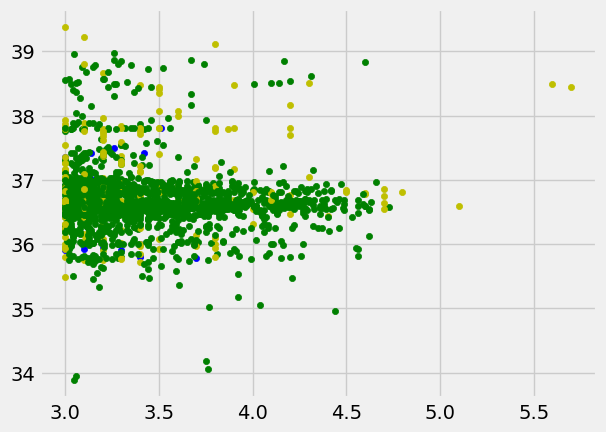

In [ ]:
import numpy as np
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# color = ['y', 'b', 'g', 'k']

size = 2000

# choose the column names from the dataset
features = df[['Magnitude(ergs)','Latitude(deg)']][:size].values
classes = df['Magnitude_type'][:size].values

# create 3 svm with rbf kernels
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')
svm4 = SVC(kernel ='rbf')

# fit each svm's
svm1.fit(features, (classes=='ML').astype(int))
svm2.fit(features, (classes=='Mx').astype(int))
svm3.fit(features, (classes=='Md').astype(int))

fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot the contours
'''
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)
'''
color = ['y', 'b', 'g', 'k', 'm']



for i in range(size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[0])
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[1])
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[2])
    else:
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[4])
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict the target variable on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using mean squared error and R^2 score
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse_rf)
print('R^2 Score: ', r2_rf)

Mean Squared Error:  0.14335954244315033
R^2 Score:  0.21228710145685914


In [ ]:
import matplotlib.pyplot as plt

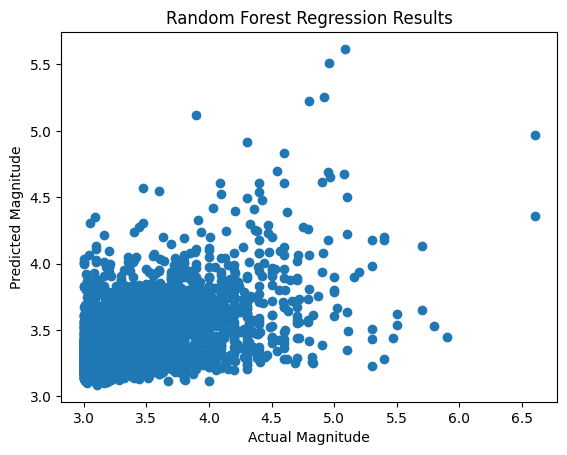

In [ ]:
# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()

In [ ]:
 rf.feature_importances_

array([0.16182177, 0.13860327, 0.17513597, 0.18373404, 0.1409066 ,
       0.19979835])

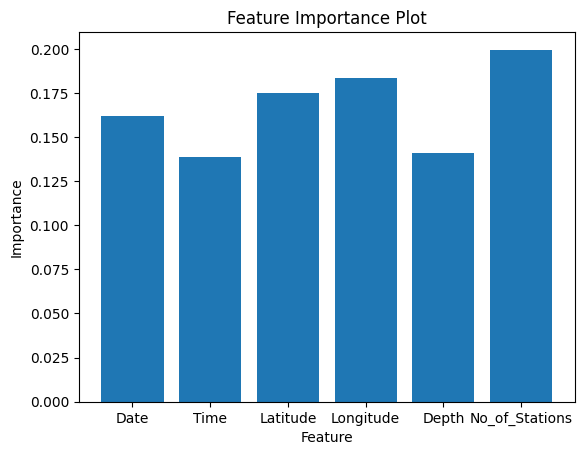

In [ ]:
importances = rf.feature_importances_
features = ['Date','Time','Latitude', 'Longitude', 'Depth', 'No_of_Stations']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

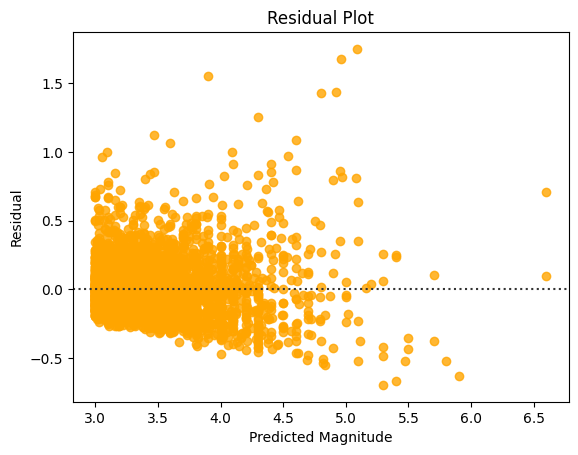

In [ ]:
import seaborn as sns
sns.residplot(x= y_test, y =y_pred, color='orange')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

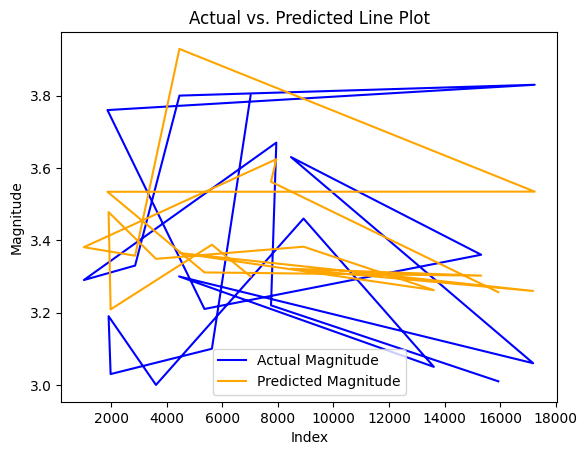

In [ ]:
plt.plot(y_test.index[:20], y_test[:20], color='blue', label='Actual Magnitude')
plt.plot(y_test.index[:20], y_pred[:20], color='orange', label='Predicted Magnitude')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.show()

In [ ]:
scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

In [ ]:
scores['mse'].append(mse_lr)
scores['R^2'].append(r2_lr)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

scores['mse'].append(mse_rf)
scores['R^2'].append(r2_rf)

In [ ]:
scores_df = pd.DataFrame(scores)
display(scores_df)

,Model name,mse,R^2
0,Linear regression,0.181982,0.000067
1,SVM,7.210290,-38.618141
2,Random Forest,0.143360,0.212287


In [ ]:
scores_df[scores_df["mse"] == scores_df["mse"].min()]

,Model name,mse,R^2
2,Random Forest,0.14336,0.212287


In [ ]:
scores_df[scores_df["R^2"] == scores_df["R^2"].max()]

,Model name,mse,R^2
2,Random Forest,0.14336,0.212287
